In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


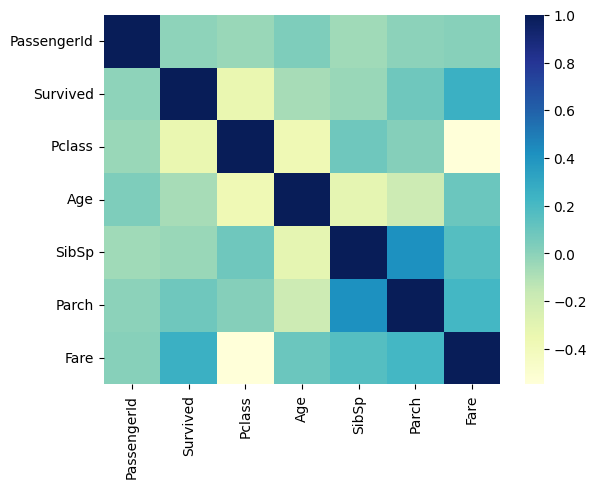

In [ ]:
numeric_data = titanic_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr() , cmap='YlGnBu' )
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data['Survived']):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

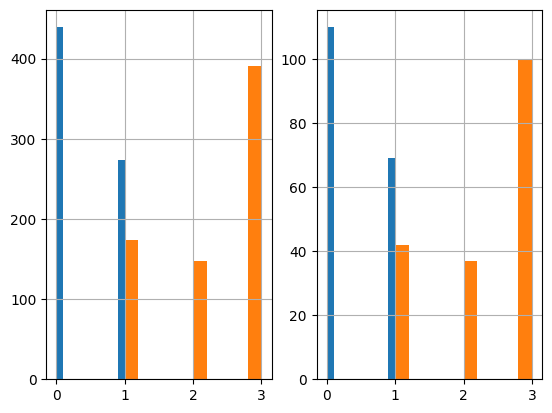

In [ ]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 573 to 548
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
from sklearn.base import BaseEstimator ,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator , TransformerMixin):

  def fit(self , X , y=None):
    return self

  def transform(self ,X):
    imputer = SimpleImputer(strategy='mean')
    X['Age']= imputer.fit_transform(X[['Age']])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator ,TransformerMixin):

  def fit(self , X , y=None):
    return self

  def transform(self ,X):
    encoder = OneHotEncoder()
    matrix= encoder.fit_transform(X[['Embarked']]).toarray()

    column_names =['C','S','Q','N']

    for i in range(len(matrix.T)):
      X[column_names[i]]= matrix.T[i]

    matrix= encoder.fit_transform(X[['Sex']]).toarray()

    column_names =['Female','Male']

    for i in range(len(matrix.T)):
      X[column_names[i]]= matrix.T[i]

    return X

In [ ]:
class FeatureDropper(BaseEstimator ,TransformerMixin):

  def fit(self , X , y=None):
    return self

  def transform(self ,X):
    return X.drop(['Embarked','Name','Ticket','Cabin','Sex','N'], axis=1 , errors='ignore')


In [ ]:
from sklearn.pipeline import Pipeline

pipeline= Pipeline([('AgeImputer',AgeImputer()),
                    ('FeatureEncoder',FeatureEncoder()),
                    ('FeatureDropper',FeatureDropper())
                    ])

NameError: name 'AgeImputer' is not defined

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 573 to 548
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
# from sklearn.preprocessing import StandardScaler

# X=strat_test_set.drop(['Survived'], axis=1)
# y=strat_test_set['Survived']

# scaler = StandardScaler()
# X_data = scaler.fit_transform(X)
# y_data = y.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

X=strat_test_set.drop(['Survived'], axis=1)
y=strat_test_set['Survived']

numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]

X_numeric = X_numeric.fillna(X_numeric.mean())

scaler = StandardScaler()
X_data = scaler.fit_transform(X_numeric)

y_data = y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid =[
    {'n_estimators':[10,100,200,500],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf= grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=10)

In [ ]:
# strat_test_set = pipeline.fit_transform(strat_test_set)

In [ ]:
X_test = strat_test_set.drop(["Survived"], axis=1)
Y_test = strat_test_set["Survived"]

scaler   = StandardScaler()
X_data_test = scaler.fit_transform(X_test.select_dtypes(include=['number']).fillna(0))
Y_data_test = Y_test.to_numpy()

In [ ]:
final_clf.score(X_data_test, Y_data_test)

0.8435754189944135

In [ ]:
final_data = pipeline.fit_transform(titanic_data) if titanic_data is not None in titanic_data.columns else titanic_data

In [ ]:
final_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
X_final = final_data.drop(["Survived"], axis=1)
Y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final.select_dtypes(include=['number']).fillna(0))
Y_data_final = Y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()
param_grid =[
    {'n_estimators':[10,100,200,500],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=2, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_clf_final = grid_search.best_estimator_

In [ ]:
titanic_test_data =pd.read_csv('/content/titanic_test.csv')